In [3]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 读取数据
vixd_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')
sentiment_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

vixd_df['YearMonth'] = vixd_df['Date'].dt.strftime('%Y-%m')
sentiment_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')

# 将VIX数据按月聚合，计算每月平均值
monthly_vixd_df = vixd_df.groupby('YearMonth').mean().reset_index()


# 合并数据
merged_df = pd.merge(monthly_vixd_df, sentiment_df, on='YearMonth', how='inner')

# 选择需要的列进行格兰杰因果检验
vix_col ='Average_VIXD'
sentiment_cols = ['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment']

# 对每个情绪参数分别进行格兰杰因果检验
for sentiment_col in sentiment_cols:
    print(f"\nGranger Causality Test for VIX and {sentiment_col}")
    data = merged_df[[vix_col, sentiment_col]]
    
    # 确保maxlag是一个正整数且样本量足够大
    maxlag = 5
    
    if maxlag > 0:
        try:
            test_result = grangercausalitytests(data, maxlag=maxlag)
            
            for lag, result in test_result.items():
                print(f'\nLag: {lag}')
                for key, value in result[0].items():
                    print(f'{key}: {value}')
                    
        except ValueError as e:
            print(f"Error: {e}")
    else:
        print("Error: Insufficient observations to perform Granger Causality Test with a positive maxlag")


Granger Causality Test for VIX and Overall Positive Sentiment

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2786  , p=0.1410  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=2.4922  , p=0.1144  , df=1
likelihood ratio test: chi2=2.4075  , p=0.1208  , df=1
parameter F test:         F=2.2786  , p=0.1410  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3427  , p=0.2769  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=3.1485  , p=0.2072  , df=2
likelihood ratio test: chi2=3.0111  , p=0.2219  , df=2
parameter F test:         F=1.3427  , p=0.2769  , df_denom=29, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3855  , p=0.7643  , df_denom=26, df_num=3
ssr based chi2 test:   chi2=1.4678  , p=0.6897  , df=3
likelihood ratio test: chi2=1.4361  , p=0.6971  , df=3
parameter F test:         F=0.3855  , p=0.7643  , df_denom=26, df_num=3

Granger Causality
number of lags (no


Monthly VIXD DataFrame head:
  YearMonth   Open   High    Low      Close  Volume  Period_Average  \
0   2020-01    NaN    NaN    NaN  13.940952     0.0       13.940952   
1   2020-02  25.57  34.78  24.99  19.628947     0.0       19.628947   
2   2020-03    NaN    NaN    NaN  57.736818     0.0       57.736818   
3   2020-04    NaN    NaN    NaN  41.453810     0.0       41.453810   
4   2020-05    NaN    NaN    NaN  30.897000     0.0       30.897000   

   Annual_Percent_Change  Average_VIXD  
0                    NaN     13.223434  
1                    NaN     16.089180  
2                    NaN     45.727857  
3                    NaN     49.797286  
4                    NaN     33.692117  

Merged DataFrame head:
  YearMonth   Open   High    Low      Close  Volume  Period_Average  \
0   2020-01    NaN    NaN    NaN  13.940952     0.0       13.940952   
1   2020-02  25.57  34.78  24.99  19.628947     0.0       19.628947   
2   2020-03    NaN    NaN    NaN  57.736818     0.0       57

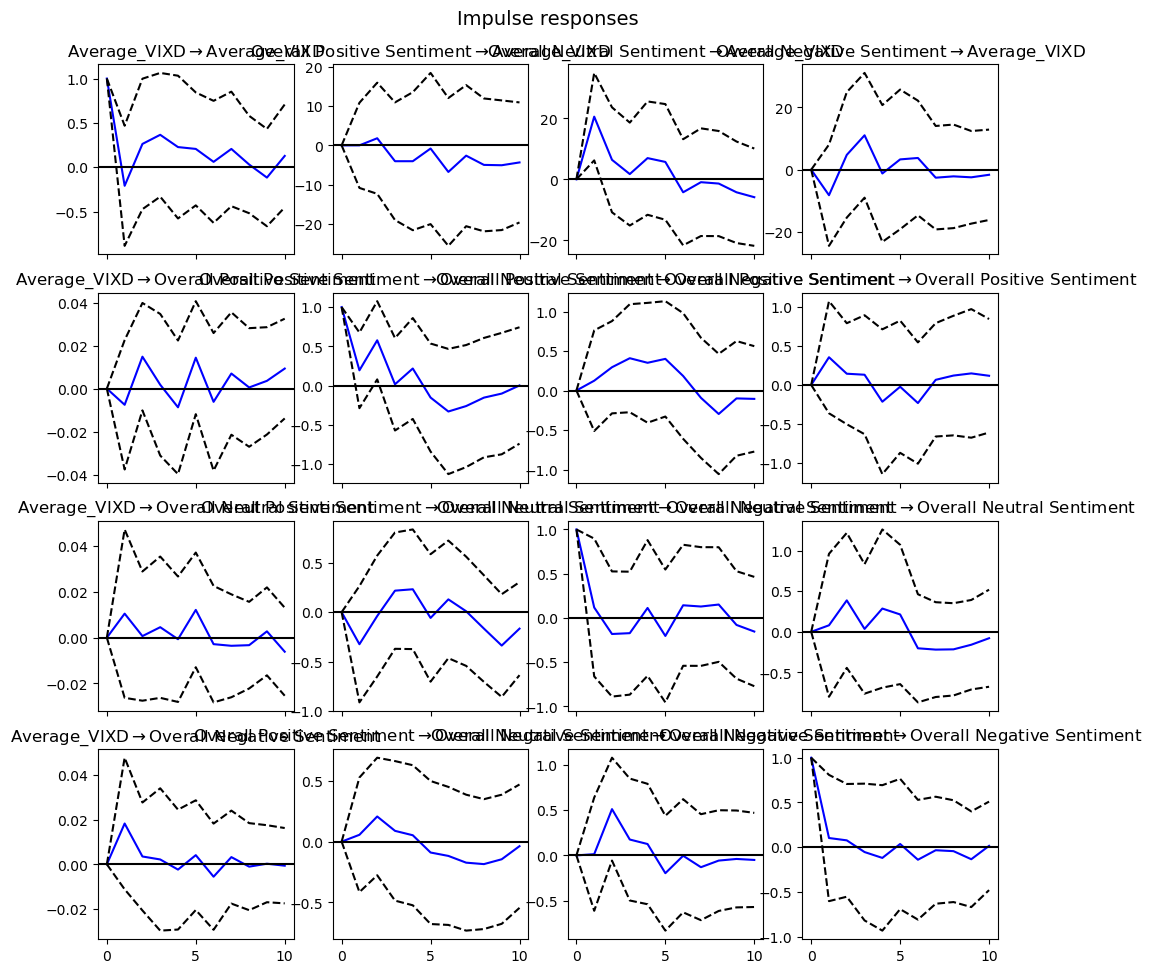

In [4]:
import pandas as pd
from statsmodels.tsa.api import VAR

# 读取数据
vixd_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')
sentiment_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

vixd_df['YearMonth'] = vixd_df['Date'].dt.strftime('%Y-%m')
sentiment_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')

# 将VIX数据按月聚合，计算每月平均值
monthly_vixd_df = vixd_df.groupby('YearMonth').mean().reset_index()

# 检查聚合后的数据
print("\nMonthly VIXD DataFrame head:")
print(monthly_vixd_df.head())

# 合并数据
merged_df = pd.merge(monthly_vixd_df, sentiment_df, on='YearMonth', how='inner')

# 检查合并后的数据
print("\nMerged DataFrame head:")
print(merged_df.head())

# 选择需要的列
vix_col = 'Average_VIXD'  # 假设VIX列的名称是 'VIX'
sentiment_cols = ['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment']

# 选择用于VAR模型的列
data = merged_df[[vix_col] + sentiment_cols]

# 检查数据长度
num_obs = len(data)
num_eqs = len(data.columns)

print(f"Total number of observations: {num_obs}")
print(f"Total number of equations: {num_eqs}")

# 计算最大的滞后期数
maxlags_possible = (num_obs // (num_eqs + 1)) - 1
maxlags = min(5, maxlags_possible)

if maxlags > 0:
    try:
        # 训练VAR模型
        model = VAR(data)
        results = model.fit(maxlags=maxlags, ic='aic')

        # 输出结果
        print(results.summary())

        # 绘制脉冲响应函数
        irf = results.irf(10)
        irf.plot(orth=False)
    except ValueError as e:
        print(f"Error: {e}")
else:
    print("Error: Insufficient observations to perform VAR model with a positive maxlag")

In [5]:
print(monthly_vixd_df)

   YearMonth       Open       High        Low      Close  Volume  \
0    2020-01        NaN        NaN        NaN  13.940952     0.0   
1    2020-02  25.570000  34.780000  24.990000  19.628947     0.0   
2    2020-03        NaN        NaN        NaN  57.736818     0.0   
3    2020-04        NaN        NaN        NaN  41.453810     0.0   
4    2020-05        NaN        NaN        NaN  30.897000     0.0   
5    2020-06        NaN        NaN        NaN  31.119545     0.0   
6    2020-07        NaN        NaN        NaN  26.840455     0.0   
7    2020-08        NaN        NaN        NaN  22.889524     0.0   
8    2020-09        NaN        NaN        NaN  27.647619     0.0   
9    2020-10        NaN        NaN        NaN  29.438636     0.0   
10   2020-11        NaN        NaN        NaN  24.995500     0.0   
11   2020-12        NaN        NaN        NaN  22.374091     0.0   
12   2021-01        NaN        NaN        NaN  24.910000     0.0   
13   2021-02        NaN        NaN        NaN  2

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 读取数据
vixd_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')
sentiment_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

vixd_df['YearMonth'] = vixd_df['Date'].dt.strftime('%Y-%m')
sentiment_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')

# 将VIX数据按月聚合，计算每月平均值
monthly_vixd_df = vixd_df.groupby('YearMonth').mean().reset_index()


# 合并数据
merged_df = pd.merge(monthly_vixd_df, sentiment_df, on='YearMonth', how='inner')

# 选择需要的列进行格兰杰因果检验
vix_col ='Average_VIXD'
sentiment_cols = ['Positive', 'Neutral','Negative']

# 对每个情绪参数分别进行格兰杰因果检验
for sentiment_col in sentiment_cols:
    print(f"\nGranger Causality Test for VIX and {sentiment_col}")
    data = merged_df[[vix_col, sentiment_col]]
    
    # 确保maxlag是一个正整数且样本量足够大
    maxlag = 5
    
    if maxlag > 0:
        try:
            test_result = grangercausalitytests(data, maxlag=maxlag)
            
            for lag, result in test_result.items():
                print(f'\nLag: {lag}')
                for key, value in result[0].items():
                    print(f'{key}: {value}')
                    
        except ValueError as e:
            print(f"Error: {e}")
    else:
        print("Error: Insufficient observations to perform Granger Causality Test with a positive maxlag")


Granger Causality Test for VIX and Positive

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4915  , p=0.4883  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=0.5376  , p=0.4634  , df=1
likelihood ratio test: chi2=0.5335  , p=0.4651  , df=1
parameter F test:         F=0.4915  , p=0.4883  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3899  , p=0.2652  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=3.2592  , p=0.1960  , df=2
likelihood ratio test: chi2=3.1123  , p=0.2109  , df=2
parameter F test:         F=1.3899  , p=0.2652  , df_denom=29, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2032  , p=0.8932  , df_denom=26, df_num=3
ssr based chi2 test:   chi2=0.7737  , p=0.8557  , df=3
likelihood ratio test: chi2=0.7648  , p=0.8579  , df=3
parameter F test:         F=0.2032  , p=0.8932  , df_denom=26, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 读取数据
vixd_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')
sentiment_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

vixd_df['YearMonth'] = vixd_df['Date'].dt.strftime('%Y-%m')
sentiment_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')

# 将VIX数据按月聚合，计算每月平均值
monthly_vixd_df = vixd_df.groupby('YearMonth').mean().reset_index()


# 合并数据
merged_df = pd.merge(monthly_vixd_df, sentiment_df, on='YearMonth', how='inner')

# 选择需要的列进行格兰杰因果检验
vix_col ='Average_VIXD'
sentiment_cols = [ 'Polarity','Subjectivity']

# 对每个情绪参数分别进行格兰杰因果检验
for sentiment_col in sentiment_cols:
    print(f"\nGranger Causality Test for VIX and {sentiment_col}")
    data = merged_df[[vix_col, sentiment_col]]
    
    # 确保maxlag是一个正整数且样本量足够大
    maxlag = 5
    
    if maxlag > 0:
        try:
            test_result = grangercausalitytests(data, maxlag=maxlag)
            
            for lag, result in test_result.items():
                print(f'\nLag: {lag}')
                for key, value in result[0].items():
                    print(f'{key}: {value}')
                    
        except ValueError as e:
            print(f"Error: {e}")
    else:
        print("Error: Insufficient observations to perform Granger Causality Test with a positive maxlag")


Granger Causality Test for VIX and Polarity

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0438  , p=0.3146  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=1.1417  , p=0.2853  , df=1
likelihood ratio test: chi2=1.1234  , p=0.2892  , df=1
parameter F test:         F=1.0438  , p=0.3146  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.0297 , p=0.0000  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=35.2421 , p=0.0000  , df=2
likelihood ratio test: chi2=24.1824 , p=0.0000  , df=2
parameter F test:         F=15.0297 , p=0.0000  , df_denom=29, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7897  , p=0.1739  , df_denom=26, df_num=3
ssr based chi2 test:   chi2=6.8148  , p=0.0780  , df=3
likelihood ratio test: chi2=6.1951  , p=0.1025  , df=3
parameter F test:         F=1.7897  , p=0.1739  , df_denom=26, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 读取数据
vixd_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')
finbert_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')
textblob_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')
vader_df = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 假设日期列为 'Date'，并将其转换为datetime格式
vixd_df['Date'] = pd.to_datetime(vixd_df['Date'])
finbert_df['Date'] = pd.to_datetime(sentiment_df['Date'])
textblob_df['Date'] = pd.to_datetime(sentiment_df['Date'])
vader_df['Date'] = pd.to_datetime(sentiment_df['Date'])

vixd_df['YearMonth'] = vixd_df['Date'].dt.strftime('%Y-%m')
finbert_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')
textblob_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')
vader_df['YearMonth'] = sentiment_df['Date'].dt.strftime('%Y-%m')
# 将VIX数据按月聚合，计算每月平均值
monthly_vixd_df = vixd_df.groupby('YearMonth').mean().reset_index()

# Merge data
finbert_merged_df = pd.merge(monthly_vixd_df, finbert_df, on='YearMonth', how='inner')
textblob_merged_df = pd.merge(monthly_vixd_df, textblob_df, on='YearMonth', how='inner')
vader_merged_df = pd.merge(monthly_vixd_df, vader_df, on='YearMonth', how='inner')

# Define columns for Granger causality test
vix_col = 'Average_VIXD'
finbert_sentiment_cols = ['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment']
textblob_sentiment_cols = ['Polarity', 'Subjectivity']
vader_sentiment_cols = [ 'Positive', 'Neutral', 'Negative']

# Function to perform Granger causality test
def granger_test(merged_df, vix_col, sentiment_cols, model_name):
    results = []
    for sentiment_col in sentiment_cols:
        data = merged_df[[vix_col, sentiment_col]]
        maxlag = 5
        if maxlag > 0:
            try:
                test_result = grangercausalitytests(data, maxlag=maxlag, verbose=False)
                for lag, result in test_result.items():
                    for key, value in result[0].items():
                        results.append({
                            'Model': model_name,
                            'Sentiment_Column': sentiment_col,
                            'Lag': lag,
                            'Test': key,
                            'Statistic': value[0],
                            'P-Value': value[1]
                        })
            except ValueError as e:
                print(f"Error: {e}")
        else:
            print("Error: Insufficient observations to perform Granger Causality Test with a positive maxlag")
    return results

# Perform Granger causality test for each model
results = []
results += granger_test(finbert_merged_df, vix_col, finbert_sentiment_cols, 'FinBERT')
results += granger_test(textblob_merged_df, vix_col, textblob_sentiment_cols, 'TextBlob')
results += granger_test(vader_merged_df, vix_col, vader_sentiment_cols, 'VADER')

# Convert results to DataFrame
results_df = pd.DataFrame(results)



In [19]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
# 将结果转换为DataFrame
results_df = pd.DataFrame(results)

# 保存结果到Excel文件
results_df.to_excel('Granger_Causality_Test_Results.xlsx', index=False)

# 显示前几行结果
print(results_df)

       Model            Sentiment_Column  Lag          Test  Statistic  \
0    FinBERT  Overall Positive Sentiment    1     ssr_ftest   2.278615   
1    FinBERT  Overall Positive Sentiment    1  ssr_chi2test   2.492235   
2    FinBERT  Overall Positive Sentiment    1        lrtest   2.407502   
3    FinBERT  Overall Positive Sentiment    1  params_ftest   2.278615   
4    FinBERT  Overall Positive Sentiment    2     ssr_ftest   1.342732   
..       ...                         ...  ...           ...        ...   
155    VADER                    Negative    4  params_ftest   0.459087   
156    VADER                    Negative    5     ssr_ftest   0.572224   
157    VADER                    Negative    5  ssr_chi2test   4.434737   
158    VADER                    Negative    5        lrtest   4.144867   
159    VADER                    Negative    5  params_ftest   0.572224   

      P-Value  
0    0.140981  
1    0.114409  
2    0.120755  
3    0.140981  
4    0.276885  
..        ...  

In [4]:
def granger_test(merged_df, vix_col, sentiment_cols, model_name):
    results = []
    for sentiment_col in sentiment_cols:
        if sentiment_col in merged_df.columns:
            data = merged_df[[vix_col, sentiment_col]]
            maxlag = 10
            if maxlag > 0:
                try:
                    test_result = grangercausalitytests(data, maxlag=maxlag, verbose=False)
                    for lag, result in test_result.items():
                        min_p_value = min(result[0].values(), key=lambda x: x[1])[1]
                        results.append({
                            'Model': model_name,
                            'Sentiment_Column': sentiment_col,
                            'Lag': lag,
                            'Min P-Value': min_p_value
                        })
                except ValueError as e:
                    print(f"Error: {e}")
            else:
                print("Error: Insufficient observations to perform Granger Causality Test with a positive maxlag")
        else:
            print(f"Sentiment column '{sentiment_col}' not found in the dataset for model '{model_name}'")
    return results

# 对每个模型执行格兰杰因果检验
results = []
results += granger_test(finbert_merged_df, vix_col, finbert_sentiment_cols, 'FinBERT')
results += granger_test(textblob_merged_df, vix_col, textblob_sentiment_cols, 'TextBlob')
results += granger_test(vader_merged_df, vix_col, vader_sentiment_cols, 'VADER')

# 将结果转换为DataFrame
results_df = pd.DataFrame(results)

# 保存结果到Excel文件
results_df.to_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sentiment compare.xlsx', index=False)

# 显示前几行结果
print(results_df)

      Model            Sentiment_Column  Lag   Min P-Value
0   FinBERT  Overall Positive Sentiment    1  1.144092e-01
1   FinBERT  Overall Positive Sentiment    2  2.071654e-01
2   FinBERT  Overall Positive Sentiment    3  6.897193e-01
3   FinBERT  Overall Positive Sentiment    4  1.999895e-01
4   FinBERT  Overall Positive Sentiment    5  3.003973e-01
..      ...                         ...  ...           ...
75    VADER                    Negative    6  5.557617e-03
76    VADER                    Negative    7  2.286485e-03
77    VADER                    Negative    8  1.218937e-08
78    VADER                    Negative    9  3.648738e-10
79    VADER                    Negative   10  1.684743e-30

[80 rows x 4 columns]
